In [1]:
import matplotlib
from matplotlib import pyplot as plt
import time
import data
import ex2

def pydistance(x1,x2):
	return sum([(x1d-x2d)**2 for x1d,x2d in zip(x1,x2)])

def pynearest(u,X,Y,distance=pydistance):
	xbest = None
	ybest = None
	dbest = float('inf')
	for x,y in zip(X,Y):
		d = distance(u,x)
		if d < dbest:
			ybest = y
			xbest = x
			dbest = d
	return ybest


def pybatch(U,X,Y,nearest=pynearest,distance=pydistance):
	return [nearest(u,X,Y,distance=distance) for u in U]

U,X,Y = data.toy(20,100,50)

In [2]:
print(pybatch(U,X,Y))
print(pybatch(U,X,Y, distance=ex2.npdistance))
print(pybatch(U,X,Y, nearest=ex2.npnearest))

[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


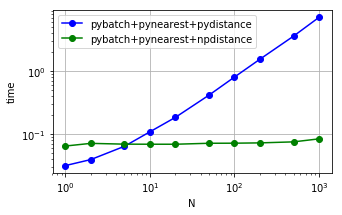

In [7]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90

# Values for the number of dimensions d to test
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# Measure the computation time for each choice of number of dimensions d
tlist = []
for d in dlist:
	U,X,Y = data.toy(100,100,d)
	a = time.clock()
	pybatch(U,X,Y)
	b = time.clock()
	tlist += [b-a]

nptlist = []
for d in dlist:
	U,X,Y = data.toy(100,100,d)
	a = time.clock()
	pybatch(U,X,Y,distance=ex2.npdistance)
	b = time.clock()
	nptlist += [b-a]

# Plot the results in a graph
plt.figure(figsize=(5,3))
plt.plot(dlist, tlist,'-o', color='blue', label='pybatch+pynearest+pydistance')
plt.plot(dlist, nptlist,'-o', color='green', label='pybatch+pynearest+npdistance')
plt.xscale('log');plt.yscale('log'); plt.xlabel('N'); plt.ylabel('time'); plt.grid(True)
plt.legend()

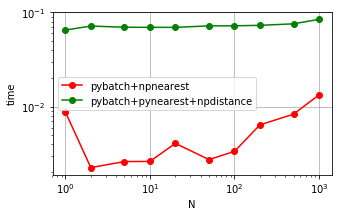

In [10]:
npnn_tlist = []
for d in dlist:
	U,X,Y = data.toy(100,100,d)
	a = time.clock()
	pybatch(U,X,Y,nearest=ex2.npnearest, distance=ex2.npdistance)
	b = time.clock()
	npnn_tlist += [b-a]

# Plot the results in a graph
plt.figure(figsize=(5,3))
#plt.plot(dlist, tlist,'-o', color='blue', label='pybatch+pynearest+pydistance')
plt.plot(dlist, npnn_tlist,'-o', color='red', label='pybatch+npnearest')
plt.plot(dlist, nptlist,'-o', color='green', label='pybatch+pynearest+npdistance')
plt.xscale('log');plt.yscale('log'); plt.xlabel('N'); plt.ylabel('time'); plt.grid(True)
plt.legend()